# Digit Recognizer on MNIST with a Simple Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7542 - loss: 0.8091 - val_accuracy: 0.9553 - val_loss: 0.1667
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9501 - loss: 0.1694 - val_accuracy: 0.9643 - val_loss: 0.1298
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9674 - loss: 0.1099 - val_accuracy: 0.9693 - val_loss: 0.1067
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0800 - val_accuracy: 0.9733 - val_loss: 0.0914
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9762 - val_loss: 0.0863
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0494 - val_accuracy: 0.9765 - val_loss: 0.0871
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0392 - val_accuracy: 0.9775 - val_loss: 0.0844
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.

# Testing with external data

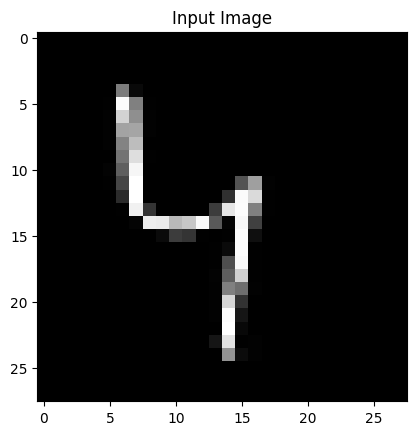

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Digit: 5


In [11]:

# Predict on a new image
img = image.load_img("003.png", color_mode="grayscale", target_size=(28, 28))
img_array = image.img_to_array(img)
img_array = 255 - img_array   # Invert if background is white
img_array = img_array.reshape(1, 784) / 255.0

plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title("Input Image")
plt.show()

prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)